# Household Income and Expenditure Analysis
## Analyst: Jamaica Loria
This notebook explores 20 insights derived from a dataset on family income and expenditures in various Philippine regions. These insights follow a narrative that uncovers patterns in income distribution, spending behavior, and living conditions.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv("dataset//fam_income_expense.csv")


df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


<h1>INCOME PATTERNS</h1>

## Insight 1: Income Distribution
how household income is distributed?

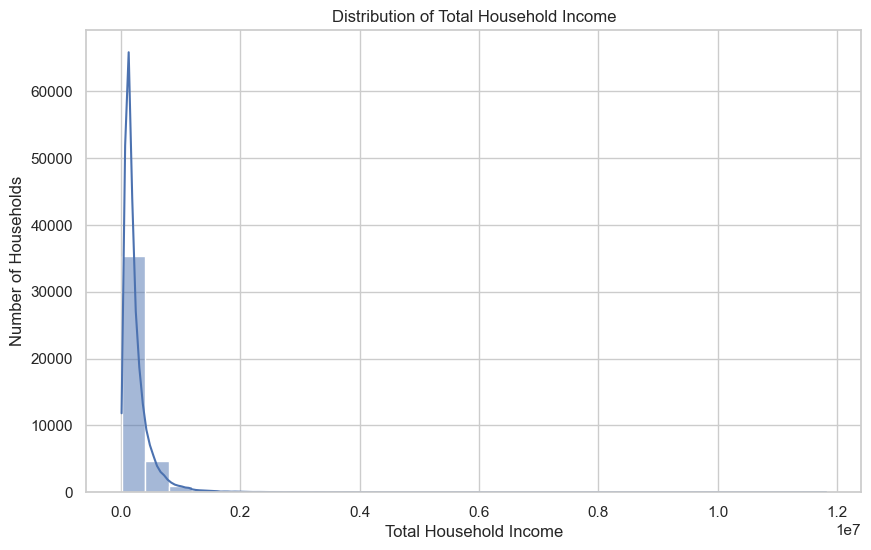

In [25]:
sns.histplot(df['Total Household Income'], kde=True, bins=30)
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Number of Households')
plt.show()

<h2>Income Distribution: Most households cluster at the lower income range, with a few outliers earning much more. This indicates income inequality within the population.<h2>

## Insight 2: Top Regions by Average Household Income

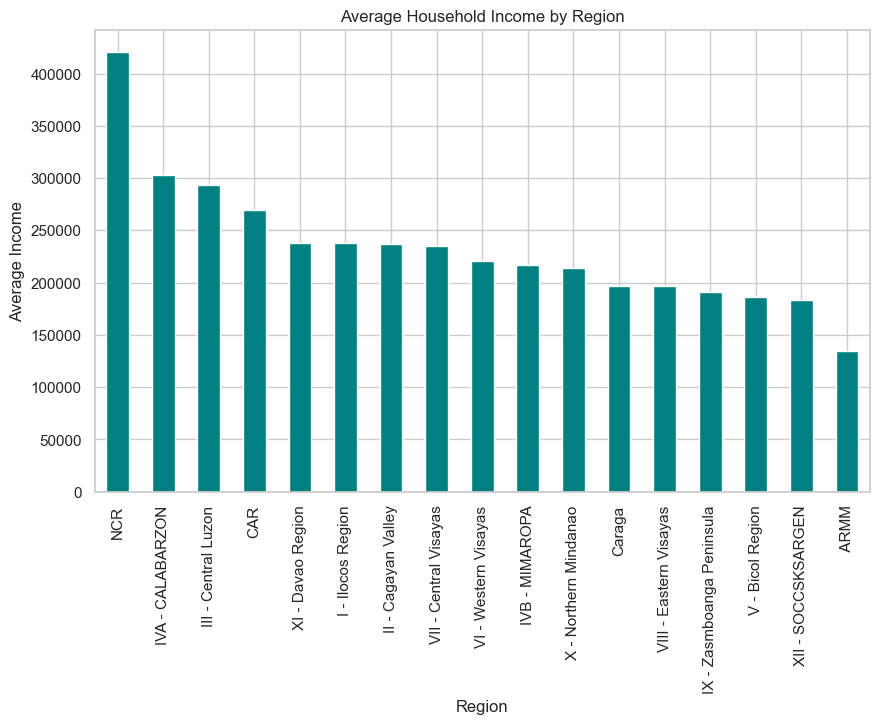

In [26]:
region_income = df.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
region_income.plot(kind='bar', color='teal')
plt.title('Average Household Income by Region')
plt.ylabel('Average Income')
plt.show()

<h2>Top Regions by Average Income: Certain regions such as NCR tend to have significantly higher average household income, possibly due to urbanization and more job opportunities.<h2>

<h1>FOOD EXPENDITURE</h1>

## Insight 3: Income vs. Food Expenditure
How does food spending change with income?

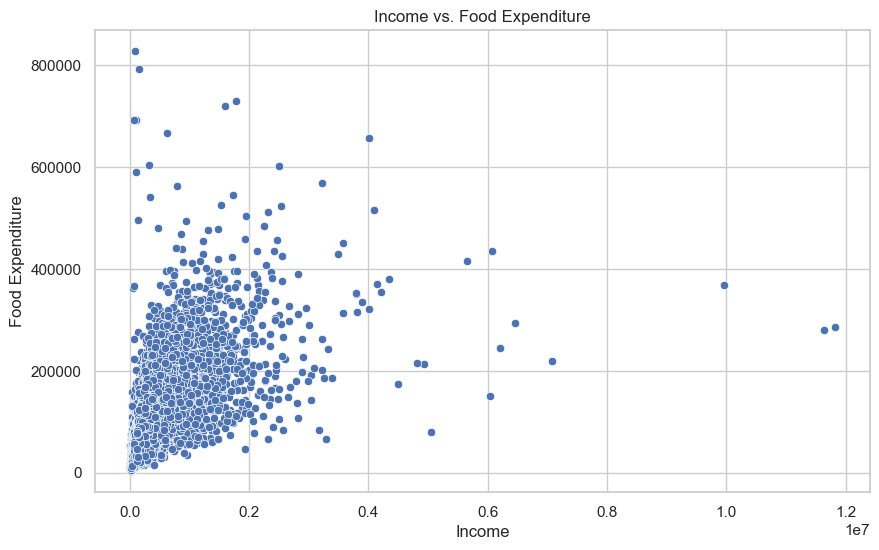

In [27]:
sns.scatterplot(x='Total Household Income', y='Total Food Expenditure', data=df)
plt.title('Income vs. Food Expenditure')
plt.xlabel('Income')
plt.ylabel('Food Expenditure')
plt.show()

<h2> Income vs. Food Expenditure: Food spending increases with income, but not proportionally. Wealthier households spend more in absolute terms, but a smaller share of income.<h2>

## Insight 4: Share of Food Expenditure by Income Quartile

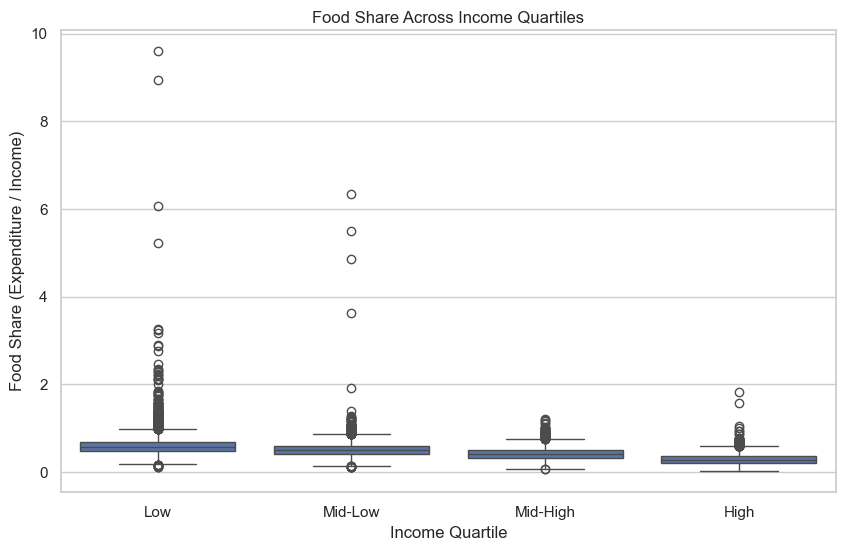

In [28]:
df['Income Quartile'] = pd.qcut(df['Total Household Income'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
df['Food Share'] = df['Total Food Expenditure'] / df['Total Household Income']
sns.boxplot(x='Income Quartile', y='Food Share', data=df)
plt.title('Food Share Across Income Quartiles')
plt.ylabel('Food Share (Expenditure / Income)')
plt.show()

<h2>Food Share by Income Quartile: Poorer households dedicate a larger percentage of their income to food, highlighting the financial pressure of basic needs.<h2>

## Insight 5: Rice Expenditure Share
How much of food spending goes to rice?

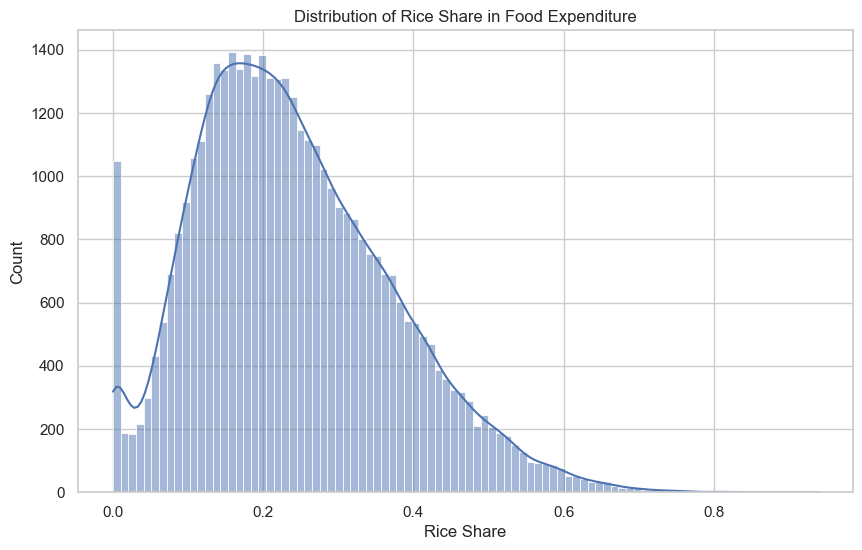

In [29]:
df['Rice Share'] = df['Total Rice Expenditure'] / df['Total Food Expenditure']
sns.histplot(df['Rice Share'], kde=True)
plt.title('Distribution of Rice Share in Food Expenditure')
plt.xlabel('Rice Share')
plt.show()

<h2>Rice Share in Food Spending: A large portion of food expenditure in many households goes to rice, especially in lower-income groups, underlining its role as a staple.<h2>

<h1>FOOD CATEGORIES</h1>

## Insight 6: Meat vs. Fish Expenditure
Do households spend more on meat or fish?

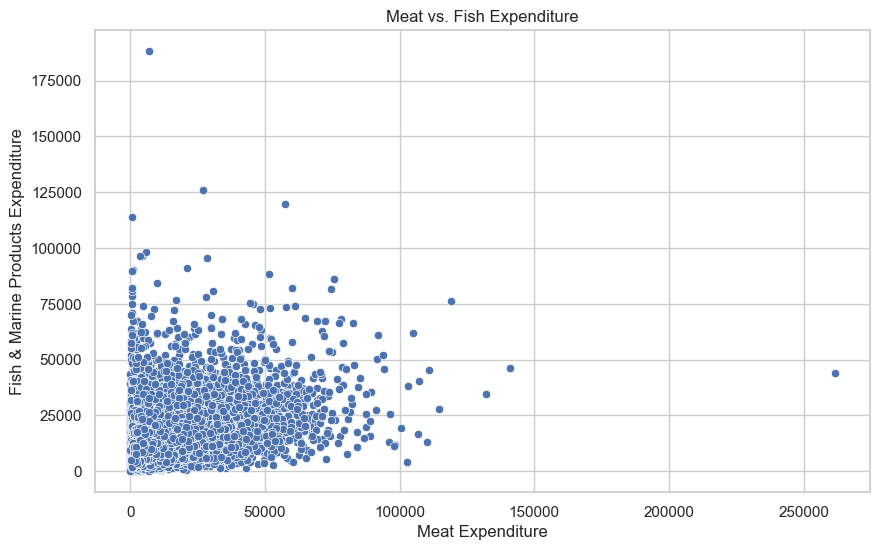

In [30]:
sns.scatterplot(x='Meat Expenditure', y='Total Fish and  marine products Expenditure', data=df)
plt.title('Meat vs. Fish Expenditure')
plt.xlabel('Meat Expenditure')
plt.ylabel('Fish & Marine Products Expenditure')
plt.show()

<h2>Meat vs. Fish Expenditure: Spending on meat is generally higher than on fish. However, some households prefer fish, possibly due to regional availability or dietary preferences.<h2>

## Insight 7: Bread and Cereals as a Portion of Food Budget

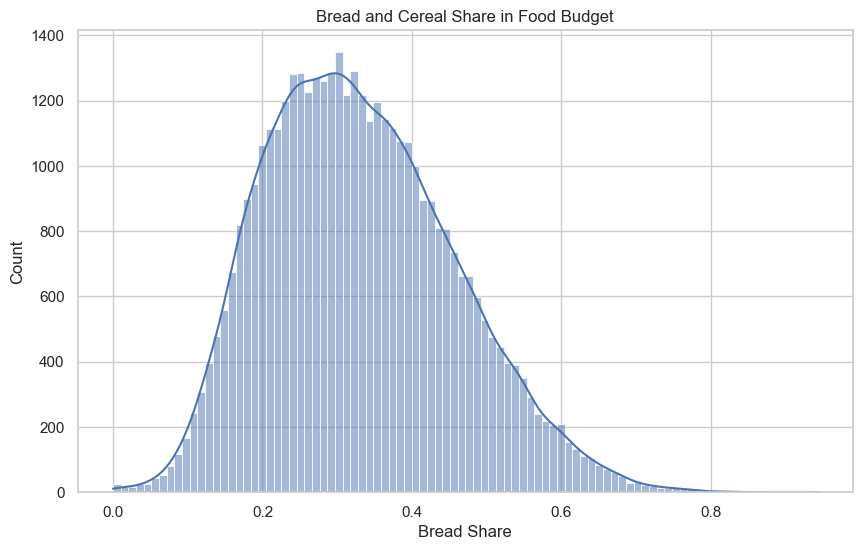

In [31]:
df['Bread Share'] = df['Bread and Cereals Expenditure'] / df['Total Food Expenditure']
sns.histplot(df['Bread Share'], kde=True)
plt.title('Bread and Cereal Share in Food Budget')
plt.xlabel('Bread Share')
plt.show()

<h2>Bread and Cereal Share: Bread and cereals make up a significant share of the food budget, particularly in middle- to lower-income households.<h2>

## Insight 8: Fruit Expenditure and Income


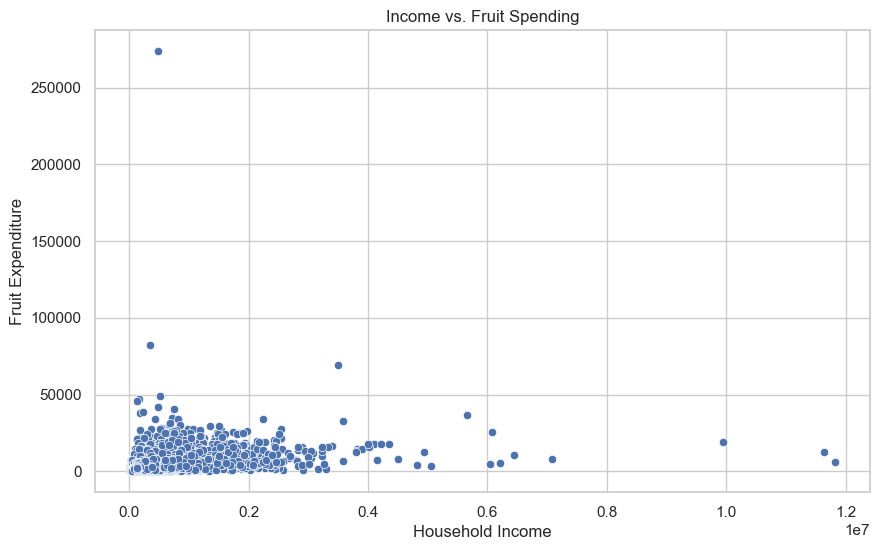

In [32]:
sns.scatterplot(x='Total Household Income', y='Fruit Expenditure', data=df)
plt.title('Income vs. Fruit Spending')
plt.xlabel('Household Income')
plt.ylabel('Fruit Expenditure')
plt.show()

<h2>Fruit Expenditure vs Income: Higher-income households spend more on fruits, which could reflect better dietary diversity and health awareness.<h2>

<h1>AGRICULTURE VS. NON-AGRICULTURE</h1>

## Insight 9: Agricultural Households and Income

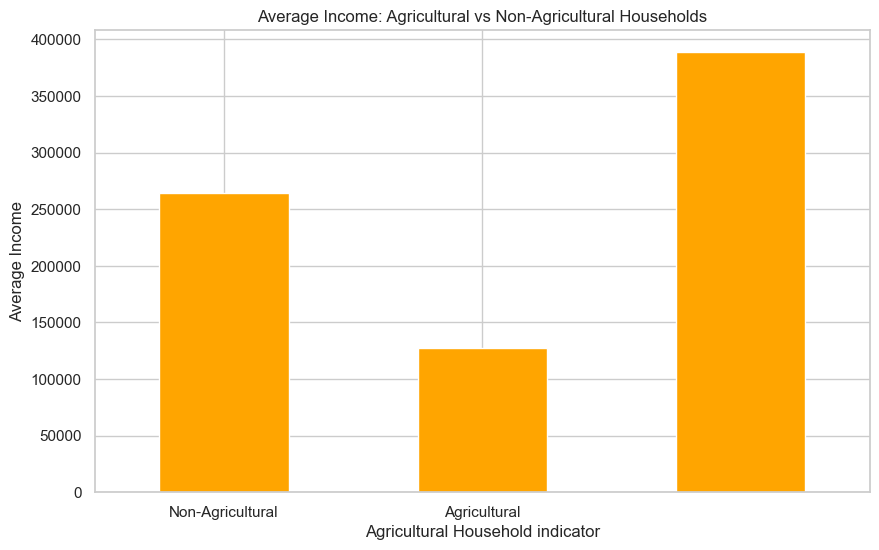

In [33]:
agri_income = df.groupby('Agricultural Household indicator')['Total Household Income'].mean()
agri_income.plot(kind='bar', color='orange')
plt.title('Average Income: Agricultural vs Non-Agricultural Households')
plt.xticks([0,1], ['Non-Agricultural', 'Agricultural'], rotation=0)
plt.ylabel('Average Income')
plt.show()

<h2>Agricultural vs. Non-Agricultural Income: Agricultural households tend to have lower average income than non-agricultural ones, reflecting the challenges of rural and farming livelihoods.<h2>

## Insight 10: Food Spending in Agricultural Households

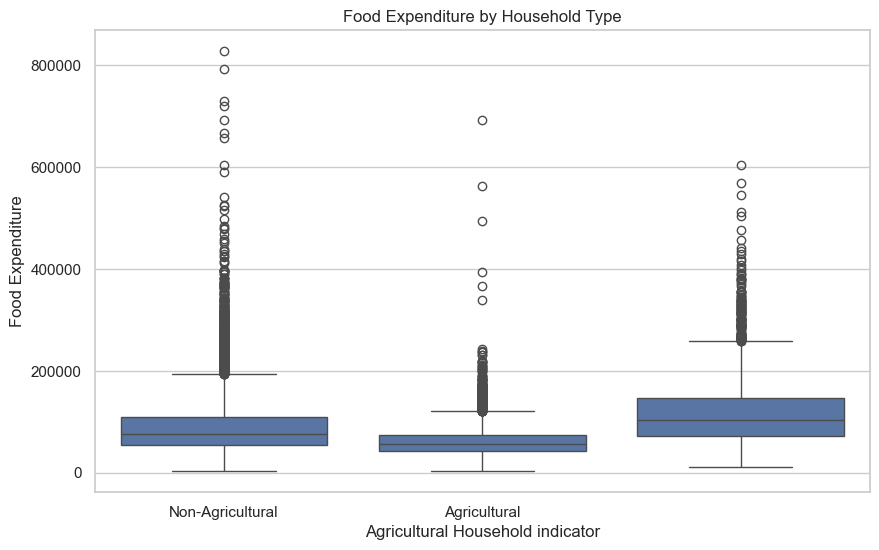

In [34]:
sns.boxplot(x='Agricultural Household indicator', y='Total Food Expenditure', data=df)
plt.xticks([0,1], ['Non-Agricultural', 'Agricultural'])
plt.title('Food Expenditure by Household Type')
plt.ylabel('Food Expenditure')
plt.show()

<h2>Agricultural Households and Food Spending: Agricultural households, despite lower income, tend to spend similarly or even more on food, possibly due to larger household size or reliance on own-grown produce.<h2>

<h1>ASSETS AND INCOME</h1>

## Insight 11: Cellular Phone Ownership and Income
Are phones a sign of higher income?

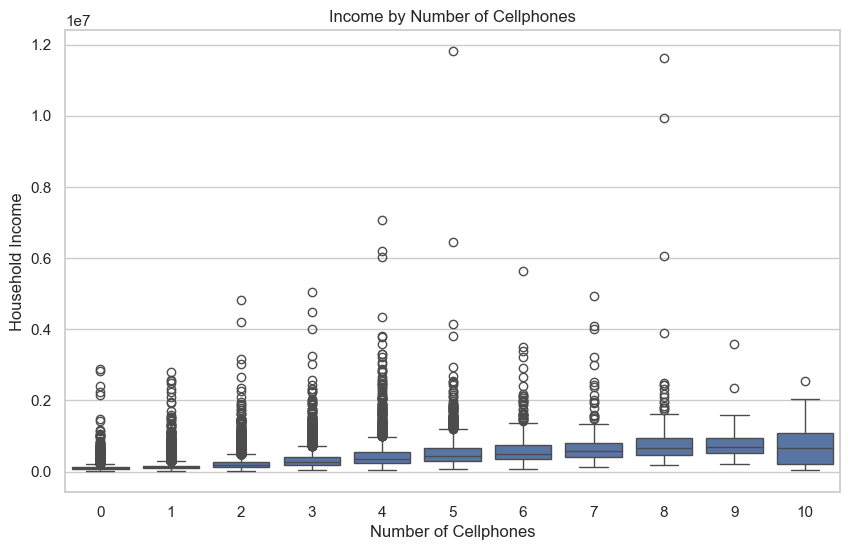

In [35]:
sns.boxplot(x='Number of Cellular phone', y='Total Household Income', data=df)
plt.title('Income by Number of Cellphones')
plt.xlabel('Number of Cellphones')
plt.ylabel('Household Income')
plt.show()

<h2>Cellphone Ownership and Income: Households with more cellphones tend to have higher income, suggesting tech access increases with financial means.<h2>

## Insight 12: Personal Computer Ownership and Income

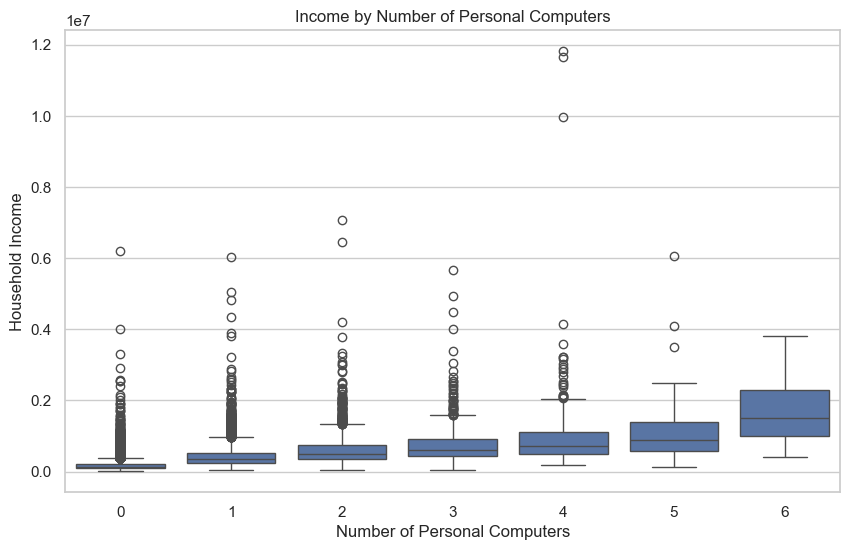

In [36]:
sns.boxplot(x='Number of Personal Computer', y='Total Household Income', data=df)
plt.title('Income by Number of Personal Computers')
plt.xlabel('Number of Personal Computers')
plt.ylabel('Household Income')
plt.show()

<h2>Personal Computer Ownership: Similar to phones, households with personal computers generally have higher incomes, indicating better digital access and potentially education levels.<h2>

## Insight 13: Gas Stove Ownership and Household Income

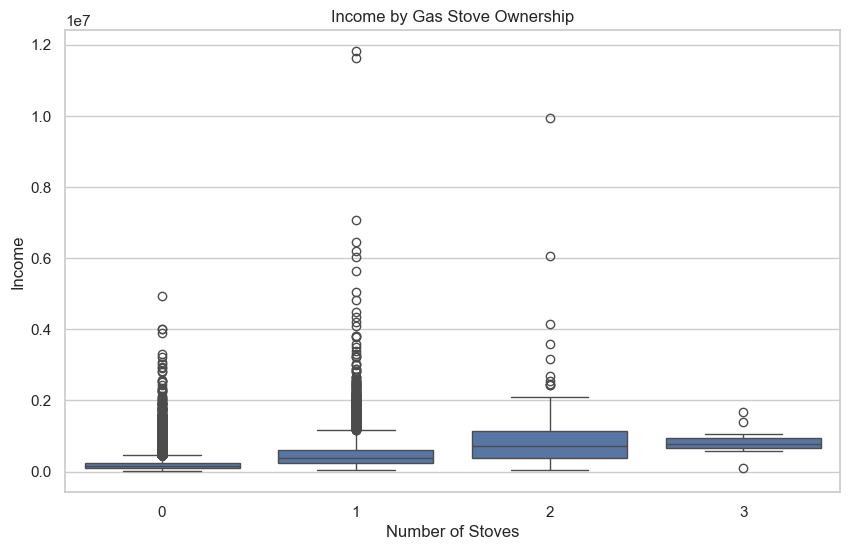

In [37]:
sns.boxplot(x='Number of Stove with Oven/Gas Range', y='Total Household Income', data=df)
plt.title('Income by Gas Stove Ownership')
plt.xlabel('Number of Stoves')
plt.ylabel('Income')
plt.show()

<h2>Gas Stove Ownership and Income: Ownership of gas stoves correlates positively with household income, indicating improved access to cooking facilities and infrastructure.<h2>

## Insight 14: Refrigerator Ownership Across Income Groups

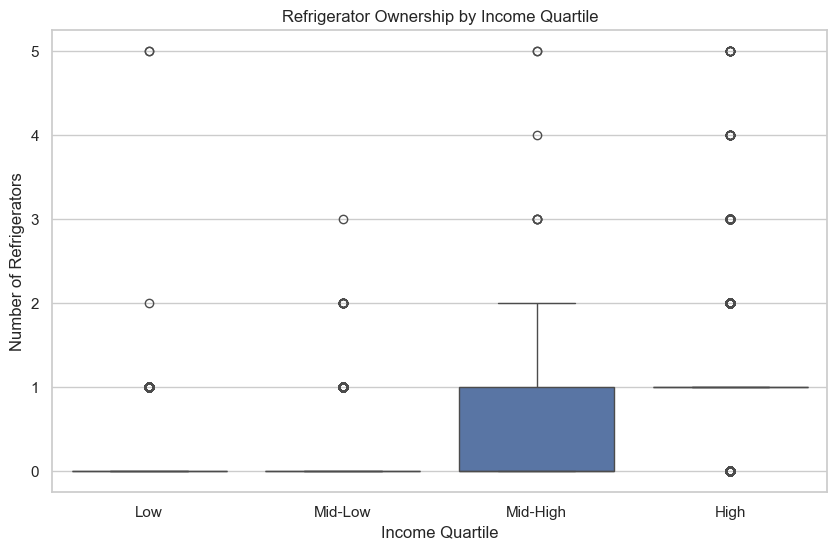

In [38]:
sns.boxplot(x='Income Quartile', y='Number of Refrigerator/Freezer', data=df)
plt.title('Refrigerator Ownership by Income Quartile')
plt.ylabel('Number of Refrigerators')
plt.show()

<h2>Refrigerator Ownership by Income Quartile: Refrigerators are more common in higher income households, signifying better food storage and living conditions.<h2>

## Insight 15: Air Conditioner Ownership and Income

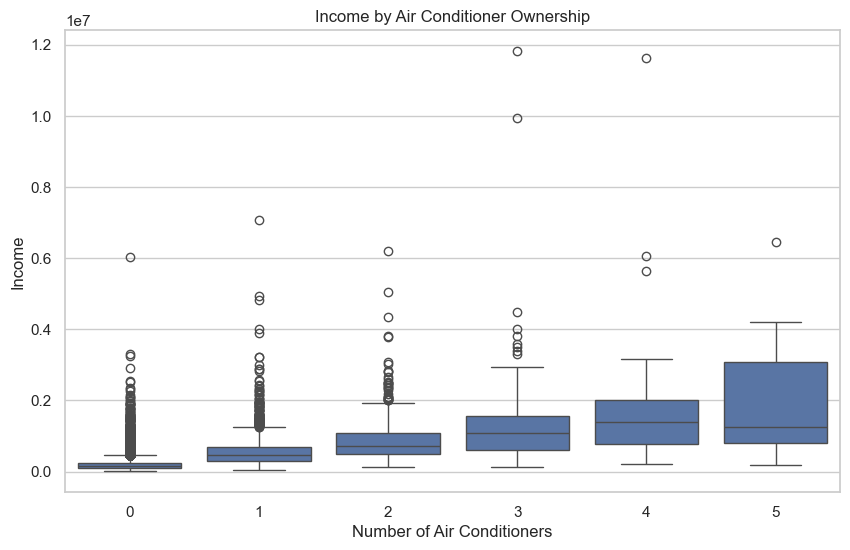

In [39]:
sns.boxplot(x='Number of Airconditioner', y='Total Household Income', data=df)
plt.title('Income by Air Conditioner Ownership')
plt.xlabel('Number of Air Conditioners')
plt.ylabel('Income')
plt.show()

<h2>Air Conditioner Ownership: Rare among low-income families but more frequent as income rises, A/C ownership reflects improved quality of life and comfort.<h2>

<h1>VEHICLES AND TECHNOLOGY</h1>

## Insight 16: Vehicle Ownership and Household Income

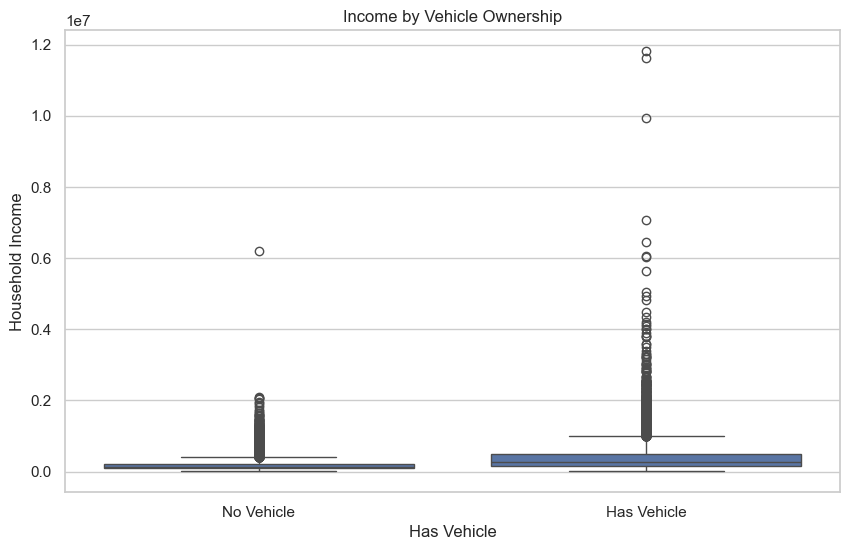

In [40]:
df['Has Vehicle'] = df['Number of Car, Jeep, Van'] + df['Number of Motorcycle/Tricycle']
df['Has Vehicle'] = df['Has Vehicle'] > 0 

sns.boxplot(x='Has Vehicle', y='Total Household Income', data=df)
plt.xticks([0, 1], ['No Vehicle', 'Has Vehicle'])
plt.title('Income by Vehicle Ownership')
plt.ylabel('Household Income')
plt.show()

<h2>Vehicle Ownership and Income: Households owning cars or motorcycles generally have significantly higher incomes, indicating better mobility and financial stability.<h2>

## Insight 17: Motorcycle Ownership and Income

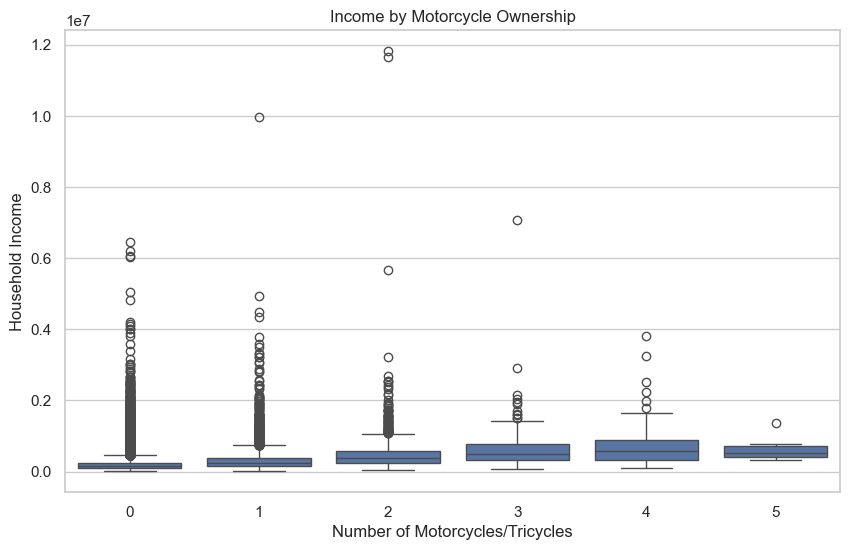

In [41]:
sns.boxplot(x='Number of Motorcycle/Tricycle', y='Total Household Income', data=df)
plt.title('Income by Motorcycle Ownership')
plt.xlabel('Number of Motorcycles/Tricycles')
plt.ylabel('Household Income')
plt.show()

<h2>Motorcycle Ownership: Motorcycles are more common among moderately earning households, possibly due to affordability and utility in rural areas.<h2>

## Insight 18: Regional Differences in Food Spending

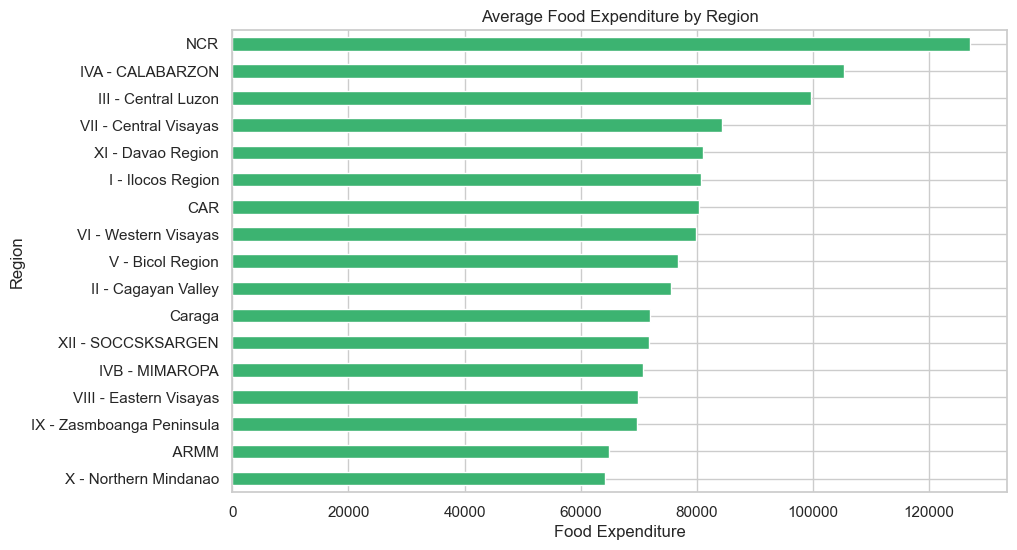

In [42]:
region_food = df.groupby('Region')['Total Food Expenditure'].mean().sort_values()
region_food.plot(kind='barh', color='mediumseagreen')
plt.title('Average Food Expenditure by Region')
plt.xlabel('Food Expenditure')
plt.show()

<h2>Regional Food Spending: Some regions spend more on food on average, which could be due to cost of living, food availability, or income levels.<h2>

<h1>LIFESTYLE DIFFERENCES</h1>

## Insight 19: Identifying Households with High Food Budget Share

In [43]:
high_share = df[df['Food Share'] > 0.6]
low_share = df[df['Food Share'] < 0.3]
print("High Share Households:", len(high_share))
print("Low Share Households:", len(low_share))

High Share Households: 7687
Low Share Households: 9074


<h2>High vs. Low Food Share Households: A notable number of households spend over 60% of their income on food, highlighting food insecurity in lower-income brackets.<h2>

<h1>FOOD AND NON FOOD SPENDING</h1>

## Insight 20: relationship between food and non-food spending

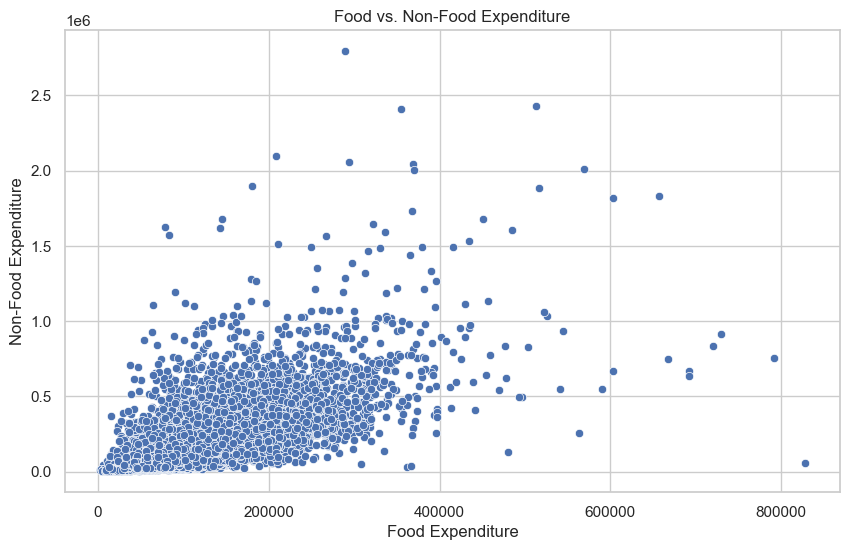

In [44]:
df['Total Household Expenditure'] = df[
    ['Total Food Expenditure',
     'Restaurant and hotels Expenditure',
     'Alcoholic Beverages Expenditure',
     'Tobacco Expenditure',
     'Clothing, Footwear and Other Wear Expenditure',
     'Housing and water Expenditure',
     'Medical Care Expenditure',
     'Transportation Expenditure',
     'Communication Expenditure',
     'Education Expenditure',
     'Miscellaneous Goods and Services Expenditure',
     'Special Occasions Expenditure']
].sum(axis=1)

df['Non-Food Expenditure'] = df['Total Household Expenditure'] - df['Total Food Expenditure']

sns.scatterplot(x='Total Food Expenditure', y='Non-Food Expenditure', data=df)
plt.title('Food vs. Non-Food Expenditure')
plt.xlabel('Food Expenditure')
plt.ylabel('Non-Food Expenditure')
plt.show()

<h2>Food and non-food spending: We observe that while both increase with overall spending, non-food expenditure tends to rise more steeply, especially in higher-income households. This indicates that wealthier families can spend more on discretionary items, while lower-income households allocate most of their budget to essentials like food.<h2>

## Summary
This analysis shows significant disparities in household income, food priorities, and asset ownership. Lower-income families spend a larger share on essentials like rice and bread, while higher-income groups have better access to appliances, technology, and diversified food.

# Clark Insights

##  Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a number.")

def get_int_input(prompt, min_val=None, max_val=None):
    while True:
        try:
            val = int(input(prompt))
            if min_val is not None and val < min_val:
                print(f"Value must be at least {min_val}.")
            elif max_val is not None and val > max_val:
                print(f"Value must be no more than {max_val}.")
            else:
                return val
        except ValueError:
            print("Invalid input. Please enter a whole number.")

def get_categorical_input(prompt, valid_options_list):
    print("Available options:")
    for i, option in enumerate(valid_options_list):
        print(f"  {i+1}. {option}")
    
    while True:
        val_input = input(prompt + f" (Enter name or number 1-{len(valid_options_list)}): ").strip()
        if val_input.isdigit():
            try:
                choice_idx = int(val_input) - 1
                if 0 <= choice_idx < len(valid_options_list):
                    return valid_options_list[choice_idx]
                else:
                    print(f"Invalid number. Please choose between 1 and {len(valid_options_list)}.")
            except ValueError:
                print("Invalid input.")

        elif val_input in valid_options_list:
            return val_input
        else:
            print(f"Invalid option. Please choose a valid name or number from the list.")

print("Libraries imported and helper functions defined.")

Libraries imported and helper functions defined.


## Load Data

In [ ]:
file_path = 'dataset//fam_income_expense.csv'
try:
    df_original = pd.read_csv(file_path)
    print(f"Dataset loaded successfully. Shape: {df_original.shape}")
    display(df_original.head())
except FileNotFoundError:
    print(f"Error: Dataset file not found at {file_path}")
    df_original = None

Dataset loaded successfully. Shape: (41544, 60)


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


## Feature Engineering and Initial Preprocessing

In [ ]:
if df_original is not None:
    df = df_original.copy()

    df['Food Share'] = (df['Total Food Expenditure'] / df['Total Household Income'].replace(0, np.nan))
    df.dropna(subset=['Food Share'], inplace=True)
    df = df[(df['Food Share'] >= 0) & (df['Food Share'] <= 1.5)]

    non_food_cols = [
        'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
        'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
        'Housing and water Expenditure', 'Medical Care Expenditure',
        'Transportation Expenditure', 'Communication Expenditure',
        'Education Expenditure', 'Miscellaneous Goods and Services Expenditure',
        'Special Occasions Expenditure', 'Crop Farming and Gardening expenses'
    ]
    existing_non_food_cols = [col for col in non_food_cols if col in df.columns]
    df['Non-Food Expenditure'] = df[existing_non_food_cols].sum(axis=1)
    df['Has Refrigerator'] = (df['Number of Refrigerator/Freezer'] > 0).astype(int)

    unique_regions = sorted(df['Region'].unique().tolist())
    print("Feature engineering complete.")
    print(f"DataFrame shape after initial processing: {df.shape}")
    print(f"Unique regions found: {len(unique_regions)}")
else:
    print("Data not loaded. Skipping feature engineering.")

Feature engineering complete.
DataFrame shape after initial processing: (41492, 63)
Unique regions found: 17


## Model 1 Training - Predicting Food Share


--- Training Model 1: Predicting Food Share ---
Food Share Model (Linear Regression) R2 score on test set: 0.3606


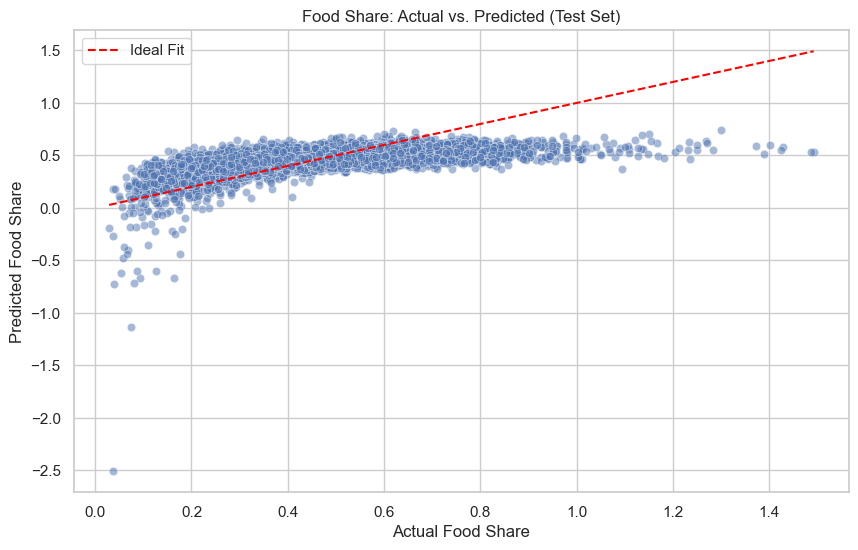

In [ ]:
if 'df' in locals() and df is not None:
    print("\n--- Training Model 1: Predicting Food Share ---")
    features_fs = ['Total Household Income', 'Total Number of Family members', 'Agricultural Household indicator', 'Region']
    X_fs_all = df[features_fs]
    y_fs_all = df['Food Share']

    numeric_transformer_fs = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer_fs = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    preprocessor_fs = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer_fs, ['Total Household Income', 'Total Number of Family members']),
            ('cat', categorical_transformer_fs, ['Agricultural Household indicator', 'Region'])])

    model_fs_pipeline = Pipeline(steps=[('preprocessor', preprocessor_fs), ('regressor', LinearRegression())])
    X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs_all, y_fs_all, test_size=0.2, random_state=42)
    model_fs_pipeline.fit(X_train_fs, y_train_fs)
    y_pred_eval_fs = model_fs_pipeline.predict(X_test_fs)
    r2_fs = r2_score(y_test_fs, y_pred_eval_fs)
    print(f"Food Share Model (Linear Regression) R2 score on test set: {r2_fs:.4f}")

    plt.figure()
    sns.scatterplot(x=y_test_fs, y=y_pred_eval_fs, alpha=0.5)
    plt.plot([min(y_test_fs), max(y_test_fs)], [min(y_test_fs), max(y_test_fs)], '--', color='red', label='Ideal Fit')
    plt.title('Food Share: Actual vs. Predicted (Test Set)')
    plt.xlabel('Actual Food Share')
    plt.ylabel('Predicted Food Share')
    plt.legend()
    plt.show()
else:
    print("Data not processed. Skipping Model 1 training.")

## Model 2 Training - Predicting Refrigerator Ownership


--- Training Model 2: Predicting Refrigerator Ownership ---
Refrigerator Ownership Model (Logistic Regression) Accuracy on test set: 0.7856
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      5190
           1       0.80      0.57      0.67      3109

    accuracy                           0.79      8299
   macro avg       0.79      0.74      0.75      8299
weighted avg       0.79      0.79      0.78      8299



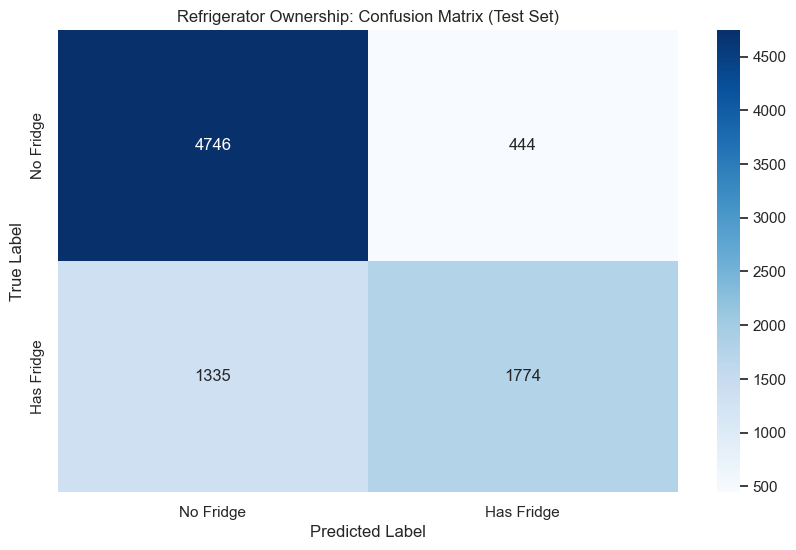

In [ ]:
if 'df' in locals() and df is not None:
    print("\n--- Training Model 2: Predicting Refrigerator Ownership ---")
    features_rg = ['Total Household Income', 'Region', 'Total Number of Family members']
    X_rg_all = df[features_rg]
    y_rg_all = df['Has Refrigerator']

    numeric_transformer_rg = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer_rg = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    preprocessor_rg = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer_rg, ['Total Household Income', 'Total Number of Family members']),
            ('cat', categorical_transformer_rg, ['Region'])])
    model_rg_pipeline = Pipeline(steps=[('preprocessor', preprocessor_rg), ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])
    X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_rg_all, y_rg_all, test_size=0.2, random_state=42, stratify=y_rg_all)
    model_rg_pipeline.fit(X_train_rg, y_train_rg)
    y_pred_eval_rg = model_rg_pipeline.predict(X_test_rg)
    accuracy_rg = accuracy_score(y_test_rg, y_pred_eval_rg)
    cm_rg = confusion_matrix(y_test_rg, y_pred_eval_rg)
    print(f"Refrigerator Ownership Model (Logistic Regression) Accuracy on test set: {accuracy_rg:.4f}")
    print("Classification Report (Test Set):\n", classification_report(y_test_rg, y_pred_eval_rg))
    
    plt.figure()
    sns.heatmap(cm_rg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fridge', 'Has Fridge'], yticklabels=['No Fridge', 'Has Fridge'])
    plt.title('Refrigerator Ownership: Confusion Matrix (Test Set)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("Data not processed. Skipping Model 2 training.")

## Model 3 Training - Predicting Non-Food Expenditure


--- Training Model 3: Predicting Non-Food Expenditure ---
Non-Food Expenditure Model (Linear Regression) R2 score on test set: 0.7156


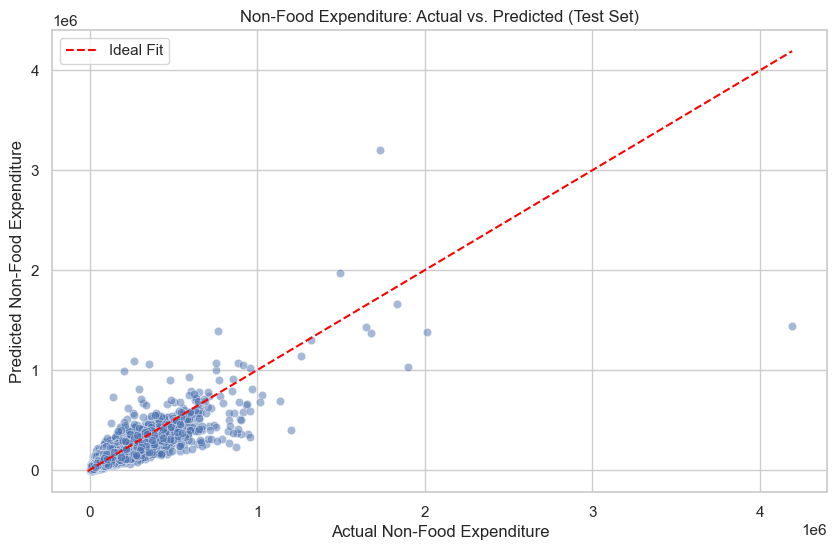

In [ ]:
if 'df' in locals() and df is not None:
    print("\n--- Training Model 3: Predicting Non-Food Expenditure ---")
    features_nf = ['Total Household Income', 'Total Food Expenditure', 'Region']
    df['Non-Food Expenditure'] = df['Non-Food Expenditure'].fillna(df['Non-Food Expenditure'].median())
    
    X_nf_all = df[features_nf]
    y_nf_all = df['Non-Food Expenditure']

    numeric_transformer_nf = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer_nf = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    preprocessor_nf = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer_nf, ['Total Household Income', 'Total Food Expenditure']),
            ('cat', categorical_transformer_nf, ['Region'])])
    model_nf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_nf), ('regressor', LinearRegression())])
    X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_nf_all, y_nf_all, test_size=0.2, random_state=42)
    model_nf_pipeline.fit(X_train_nf, y_train_nf)
    y_pred_eval_nf = model_nf_pipeline.predict(X_test_nf)
    r2_nf = r2_score(y_test_nf, y_pred_eval_nf)
    print(f"Non-Food Expenditure Model (Linear Regression) R2 score on test set: {r2_nf:.4f}")

    plt.figure()
    sns.scatterplot(x=y_test_nf, y=y_pred_eval_nf, alpha=0.5)
    max_val = max(y_test_nf.max(), y_pred_eval_nf.max())
    min_val = min(y_test_nf.min(), y_pred_eval_nf.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label='Ideal Fit')
    plt.title('Non-Food Expenditure: Actual vs. Predicted (Test Set)')
    plt.xlabel('Actual Non-Food Expenditure')
    plt.ylabel('Predicted Non-Food Expenditure')
    plt.legend()
    plt.show()
else:
    print("Data not processed. Skipping Model 3 training.")

## User Prediction - Food Share

In [ ]:
if 'model_fs_pipeline' in locals():
    print("\n--- Predict Food Share (User Input) ---")
    print("Please provide the following details for the household:")
    income = get_float_input("Total Household Income (e.g., 50000): ")
    family_members = get_int_input("Total Number of Family members (e.g., 4): ", min_val=1)
    agri_indicator = get_int_input("Is it an Agricultural Household? (0 for No, 1 for Yes): ", min_val=0, max_val=1)
    region = get_categorical_input("Region: ", unique_regions)

    user_data_fs = pd.DataFrame({
        'Total Household Income': [income],
        'Total Number of Family members': [family_members],
        'Agricultural Household indicator': [agri_indicator],
        'Region': [region]
    })
    user_data_fs = user_data_fs[features_fs]

    predicted_food_share = model_fs_pipeline.predict(user_data_fs)[0]
    print(f"\nPredicted Food Share: {predicted_food_share:.2%}")
    if predicted_food_share > 0.6:
        print("This household is predicted to spend a high proportion of its income on food, indicating potential vulnerability.")
    elif predicted_food_share < 0.3:
        print("This household is predicted to spend a relatively low proportion of its income on food.")
    else:
        print("This household is predicted to spend a moderate proportion of its income on food.")
else:
    print("Food Share model not trained. Please run the training cell first.")


--- Predict Food Share (User Input) ---
Please provide the following details for the household:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Predicted Food Share: 40.83%
This household is predicted to spend a moderate proportion of its income on food.


## User Prediction - Refrigerator Ownership

In [ ]:
if 'model_rg_pipeline' in locals():
    print("\n--- Predict Refrigerator Ownership (User Input) ---")
    print("Please provide the following details for the household:")
    income = get_float_input("Total Household Income (e.g., 100000): ")
    region = get_categorical_input("Region: ", unique_regions)
    family_members = get_int_input("Total Number of Family members (e.g., 3): ", min_val=1)

    user_data_rg = pd.DataFrame({
        'Total Household Income': [income],
        'Region': [region],
        'Total Number of Family members': [family_members]
    })
    user_data_rg = user_data_rg[features_rg]

    prediction_rg_proba = model_rg_pipeline.predict_proba(user_data_rg)[0]
    prediction_rg_class = model_rg_pipeline.predict(user_data_rg)[0]

    owns_refrigerator = "Yes" if prediction_rg_class == 1 else "No"
    print(f"\nPredicted Refrigerator Ownership: {owns_refrigerator}")
    print(f"Probability of owning a refrigerator: {prediction_rg_proba[1]:.2%}")
    print(f"Probability of NOT owning a refrigerator: {prediction_rg_proba[0]:.2%}")
else:
    print("Refrigerator Ownership model not trained. Please run the training cell first.")


--- Predict Refrigerator Ownership (User Input) ---
Please provide the following details for the household:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Predicted Refrigerator Ownership: No
Probability of owning a refrigerator: 6.15%
Probability of NOT owning a refrigerator: 93.85%


## User Prediction - Non-Food Expenditure

In [ ]:
if 'model_nf_pipeline' in locals():
    print("\n--- Predict Non-Food Expenditure (User Input) ---")
    print("Please provide the following details for the household:")
    income = get_float_input("Total Household Income (e.g., 120000): ")
    food_exp = get_float_input("Total Food Expenditure (e.g., 30000): ")
    region = get_categorical_input("Region: ", unique_regions)

    user_data_nf = pd.DataFrame({
        'Total Household Income': [income],
        'Total Food Expenditure': [food_exp],
        'Region': [region]
    })
    user_data_nf = user_data_nf[features_nf]
    predicted_non_food_exp = model_nf_pipeline.predict(user_data_nf)[0]
    print(f"\nPredicted Non-Food Expenditure: {predicted_non_food_exp:,.2f}")
    if income > 0 :
        predicted_non_food_share = (predicted_non_food_exp / income)
        print(f"This represents approximately {predicted_non_food_share:.2%} of the household's total income.")
else:
    print("Non-Food Expenditure model not trained. Please run the training cell first.")


--- Predict Non-Food Expenditure (User Input) ---
Please provide the following details for the household:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Predicted Non-Food Expenditure: 568,707.41
This represents approximately 47.39% of the household's total income.


## Interactive Insight - Regional Profile Comparison


--- Interactive Insight: Regional Profile Comparison ---
Select two regions to compare their average profiles.

Select the first region:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Select the second region:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region


,XII - SOCCSKSARGEN,ARMM
Metric,,
Avg. Total Household Income,183868.13,134746.82
Avg. Total Food Expenditure,70958.95,64931.27
Avg. Food Share (%),53.18,53.85
Avg. Non-Food Expenditure,99175.53,84198.20
Avg. Family Members,4.53,5.71
% Agricultural Households,55.24,63.70
% Owning Refrigerator,31.61,7.47
% Owning Personal Computer,13.48,3.47
"% Owning Car, Jeep, Van",4.89,1.16


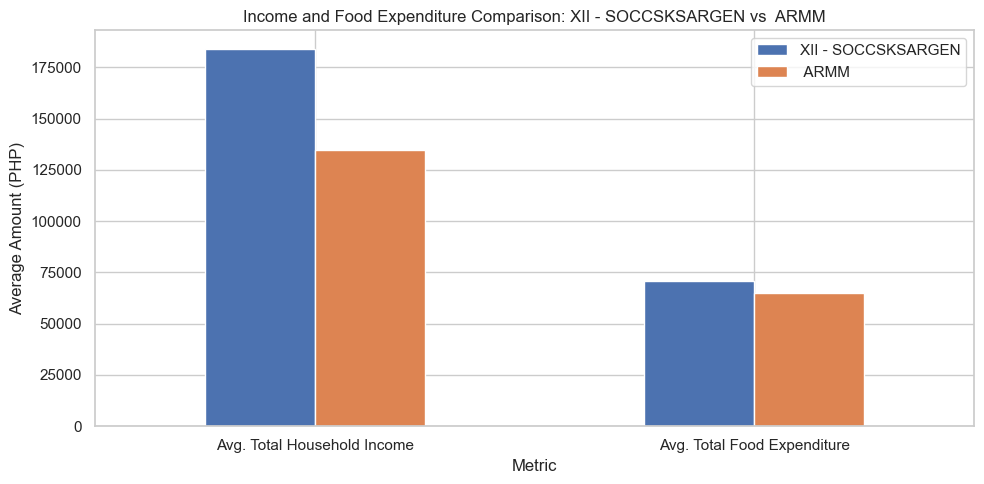

In [ ]:
if 'df' in locals() and df is not None and 'unique_regions' in locals():
    print("\n--- Interactive Insight: Regional Profile Comparison ---")
    print("Select two regions to compare their average profiles.")
    
    print("\nSelect the first region:")
    region1 = get_categorical_input("First region: ", unique_regions)
    
    print("\nSelect the second region:")
    available_regions_for_r2 = [r for r in unique_regions if r != region1]
    if not available_regions_for_r2:
        print(f"Only one region ({region1}) available or selected. Cannot compare with another distinct region.")
    else:
        region2 = get_categorical_input("Second region: ", available_regions_for_r2)

        df_region1 = df[df['Region'] == region1]
        df_region2 = df[df['Region'] == region2]

        if df_region1.empty or df_region2.empty:
            print("One or both selected regions have no data after initial processing. Cannot compare.")
        else:
            comparison_data = {
                'Metric': [
                    'Avg. Total Household Income', 
                    'Avg. Total Food Expenditure',
                    'Avg. Food Share (%)',
                    'Avg. Non-Food Expenditure',
                    'Avg. Family Members',
                    '% Agricultural Households',
                    '% Owning Refrigerator',
                    '% Owning Personal Computer',
                    '% Owning Car, Jeep, Van'
                ],
                region1: [
                    df_region1['Total Household Income'].mean(),
                    df_region1['Total Food Expenditure'].mean(),
                    df_region1['Food Share'].mean() * 100,
                    df_region1['Non-Food Expenditure'].mean(),
                    df_region1['Total Number of Family members'].mean(),
                    (df_region1['Agricultural Household indicator'].sum() / len(df_region1) * 100) if len(df_region1) > 0 else 0,
                    df_region1['Has Refrigerator'].mean() * 100,
                    (df_region1['Number of Personal Computer'] > 0).mean() * 100 if 'Number of Personal Computer' in df_region1 else 'N/A',
                    (df_region1['Number of Car, Jeep, Van'] > 0).mean() * 100 if 'Number of Car, Jeep, Van' in df_region1 else 'N/A'
                ],
                region2: [
                    df_region2['Total Household Income'].mean(),
                    df_region2['Total Food Expenditure'].mean(),
                    df_region2['Food Share'].mean() * 100,
                    df_region2['Non-Food Expenditure'].mean(),
                    df_region2['Total Number of Family members'].mean(),
                    (df_region2['Agricultural Household indicator'].sum() / len(df_region2) * 100) if len(df_region2) > 0 else 0,
                    df_region2['Has Refrigerator'].mean() * 100,
                    (df_region2['Number of Personal Computer'] > 0).mean() * 100 if 'Number of Personal Computer' in df_region2 else 'N/A',
                    (df_region2['Number of Car, Jeep, Van'] > 0).mean() * 100 if 'Number of Car, Jeep, Van' in df_region2 else 'N/A'
                ]
            }
            comparison_df = pd.DataFrame(comparison_data)
            display(comparison_df.set_index('Metric').round(2))

            metrics_to_plot = ['Avg. Total Household Income', 'Avg. Total Food Expenditure']
            plot_df = comparison_df[comparison_df['Metric'].isin(metrics_to_plot)].set_index('Metric')
            
            if not plot_df.empty:
                plot_df.plot(kind='bar', figsize=(10,5))
                plt.title(f'Income and Food Expenditure Comparison: {region1} vs {region2}')
                plt.ylabel('Average Amount (PHP)')
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.show()
else:
    print("DataFrame 'df' or 'unique_regions' not found. Please run previous cells.")

## Interactive Insight - "What If" Income Change on Food Share (Using Trained Model)

In [ ]:
if 'model_fs_pipeline' in locals() and 'df' in locals() and 'unique_regions' in locals():
    print("\n--- Interactive Insight: 'What If' Income Change on Food Share ---")
    print("Estimate the impact of an income change on a household's food share.")

    print("\nEnter current household details:")
    current_income = get_float_input("Current Total Household Income: ")
    family_members = get_int_input("Total Number of Family members: ", min_val=1)
    agri_indicator = get_int_input("Is it an Agricultural Household? (0 for No, 1 for Yes): ", min_val=0, max_val=1)
    region = get_categorical_input("Region: ", unique_regions)
    
    current_data_fs = pd.DataFrame({
        'Total Household Income': [current_income],
        'Total Number of Family members': [family_members],
        'Agricultural Household indicator': [agri_indicator],
        'Region': [region]
    })
    current_data_fs = current_data_fs[features_fs]
    
    current_predicted_food_share = model_fs_pipeline.predict(current_data_fs)[0]
    print(f"\nBased on the model, the current predicted food share is: {current_predicted_food_share:.2%}")

    hypothetical_income = get_float_input("Enter a new hypothetical Total Household Income: ")

    hypothetical_data_fs = pd.DataFrame({
        'Total Household Income': [hypothetical_income],
        'Total Number of Family members': [family_members],
        'Agricultural Household indicator': [agri_indicator],
        'Region': [region]
    })
    hypothetical_data_fs = hypothetical_data_fs[features_fs]

    new_predicted_food_share = model_fs_pipeline.predict(hypothetical_data_fs)[0]
    
    print(f"\nWith the new income of {hypothetical_income:,.2f}, the predicted food share is: {new_predicted_food_share:.2%}")
    
    change_in_share = new_predicted_food_share - current_predicted_food_share
    if current_predicted_food_share != 0 :
        percentage_point_change = change_in_share * 100
        print(f"This is a change of {percentage_point_change:+.2f} percentage points in food share.")
    else:
        print("Cannot calculate percentage point change as current predicted food share is zero.")
        
    if new_predicted_food_share > 0.6:
        print("The new predicted food share is high, indicating potential continued/increased vulnerability.")
    elif new_predicted_food_share < 0.3:
        print("The new predicted food share is relatively low.")
        
else:
    print("Food Share model ('model_fs_pipeline'), DataFrame 'df', or 'unique_regions' not found. Please run relevant previous cells.")


--- Interactive Insight: 'What If' Income Change on Food Share ---
Estimate the impact of an income change on a household's food share.

Enter current household details:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Based on the model, the current predicted food share is: -33674.63%
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter

## Interactive Insight - Dominant Income Source by Region


--- Interactive Insight: Dominant Income Source by Region ---
Select a region to see the distribution of main income sources.
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Distribution of Main Income Sources in XI - Davao Region:


,Percentage
Main Source of Income,
Wage/Salaries,54.05
Enterpreneurial Activities,26.49
Other sources of Income,19.46


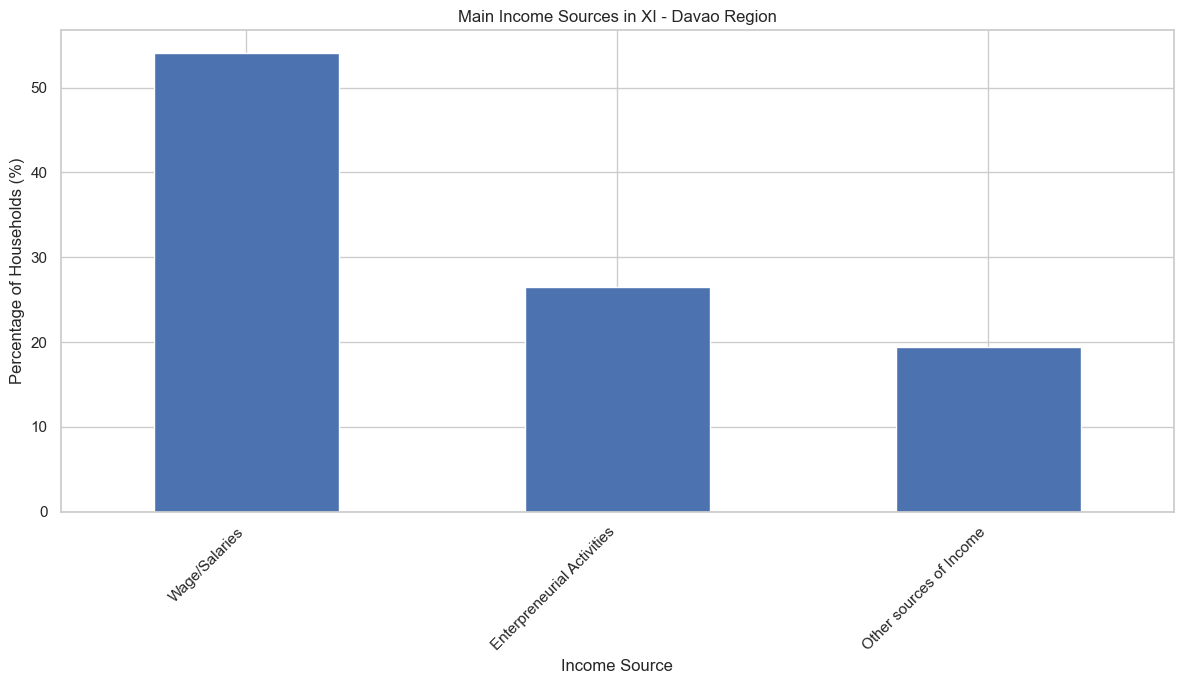

In [65]:
if 'df' in locals() and df is not None and 'unique_regions' in locals():
    if 'Main Source of Income' in df.columns:
        print("\n--- Interactive Insight: Dominant Income Source by Region ---")
        print("Select a region to see the distribution of main income sources.")
        
        region_choice = get_categorical_input("Region: ", unique_regions)
        
        df_selected_region = df[df['Region'] == region_choice]
        
        if df_selected_region.empty:
            print(f"No data available for {region_choice} after initial processing.")
        else:
            income_source_counts = df_selected_region['Main Source of Income'].value_counts(normalize=True) * 100
            
            if income_source_counts.empty:
                print(f"No 'Main Source of Income' data for households in {region_choice}.")
            else:
                print(f"\nDistribution of Main Income Sources in {region_choice}:")
                display(income_source_counts.to_frame(name='Percentage').round(2))
                
                plt.figure(figsize=(12, 7))
                income_source_counts.plot(kind='bar')
                plt.title(f'Main Income Sources in {region_choice}')
                plt.ylabel('Percentage of Households (%)')
                plt.xlabel('Income Source')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
    else:
        print("Column 'Main Source of Income' not found in the dataset. This insight cannot be generated.")
else:
    print("DataFrame 'df' or 'unique_regions' not found. Please run previous cells.")

## Interactive Insight - Asset Prevalence by Income Group in a Selected Region


--- Interactive Insight: Asset Prevalence by Income Group in a Region ---
Select a region to analyze asset prevalence by income group:
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Asset Prevalence by Income Group in V - Bicol Region:


,Television (%),Refrigerator/Freezer (%),Personal Computer (%),"Car, Jeep, Van (%)",Airconditioner (%)
Income Group,,,,,
Q1 (Lowest),39.48,3.24,0.65,0.00,0.32
Q2,61.33,10.19,2.75,0.00,0.00
Q3,81.39,23.46,10.19,0.32,1.13
Q4 (Highest),94.50,68.45,49.35,12.30,17.96


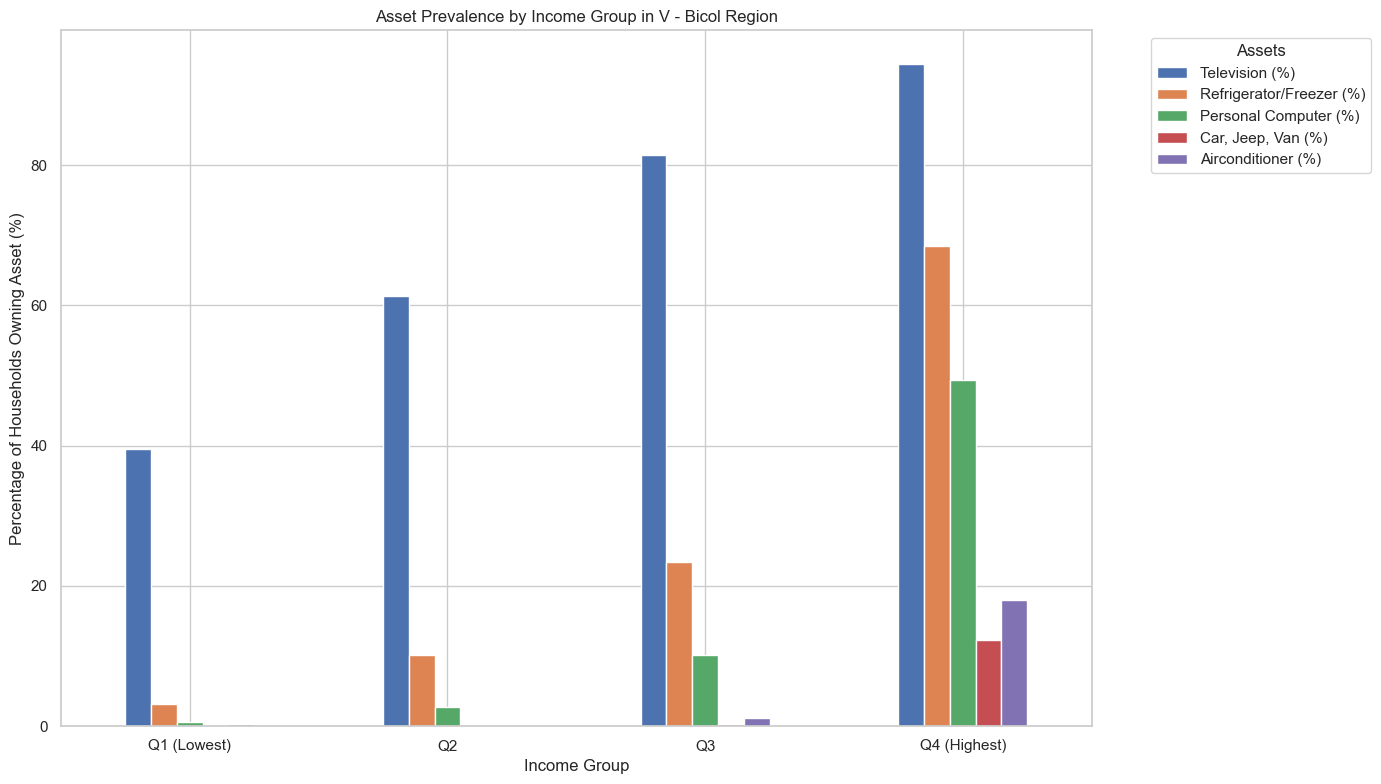

In [ ]:
if 'df' in locals() and df is not None and 'unique_regions' in locals():
    print("\n--- Interactive Insight: Asset Prevalence by Income Group in a Region ---")
    
    assets_to_check = {
        'Television': 'Number of Television',
        'Refrigerator/Freezer': 'Has Refrigerator',
        'Personal Computer': 'Number of Personal Computer',
        'Car, Jeep, Van': 'Number of Car, Jeep, Van',
        'Airconditioner': 'Number of Airconditioner'
    }
    
    valid_assets = {}
    for asset_name, col_name in assets_to_check.items():
        if col_name == 'Has Refrigerator' or col_name in df.columns:
            valid_assets[asset_name] = col_name
        else:
            print(f"Warning: Asset column '{col_name}' for '{asset_name}' not found. Skipping this asset.")

    if not valid_assets:
        print("No valid asset columns found to analyze. Cannot proceed with this insight.")
    else:
        print("Select a region to analyze asset prevalence by income group:")
        region_choice_asset = get_categorical_input("Region: ", unique_regions)
        
        df_region_asset = df[df['Region'] == region_choice_asset].copy()
        
        if df_region_asset.empty:
            print(f"No data available for {region_choice_asset} after initial processing.")
        else:
            try:
                df_region_asset['Income Quartile (Region)'] = pd.qcut(df_region_asset['Total Household Income'], 4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
            except ValueError as e: 
                print(f"Could not create 4 income quartiles for {region_choice_asset} due to: {e}. Trying fewer bins or skipping.")
                try:
                    df_region_asset['Income Group (Region)'] = pd.qcut(df_region_asset['Total Household Income'], 2, labels=['Lower Half', 'Upper Half'])
                    grouping_col = 'Income Group (Region)'
                except:
                    print("Could not create income groups. Showing overall prevalence for the region.")
                    df_region_asset['Income Group (Region)'] = 'Overall' 
                    grouping_col = 'Income Group (Region)'

            else:
                 grouping_col = 'Income Quartile (Region)'


            asset_prevalence_data = []
            for income_group, group_df in df_region_asset.groupby(grouping_col, observed=False): 
                row_data = {'Income Group': income_group}
                for asset_name, col_name in valid_assets.items():
                    if col_name == 'Has Refrigerator':
                         row_data[asset_name + ' (%)'] = group_df[col_name].mean() * 100
                    else: 
                        row_data[asset_name + ' (%)'] = (group_df[col_name] > 0).mean() * 100
                asset_prevalence_data.append(row_data)
            
            if not asset_prevalence_data:
                print(f"No asset prevalence data could be generated for {region_choice_asset}.")
            else:
                asset_prevalence_df = pd.DataFrame(asset_prevalence_data).set_index('Income Group')
                print(f"\nAsset Prevalence by Income Group in {region_choice_asset}:")
                display(asset_prevalence_df.round(2))
                
                if len(asset_prevalence_df) > 1:
                    asset_prevalence_df.plot(kind='bar', figsize=(14, 8))
                    plt.title(f'Asset Prevalence by Income Group in {region_choice_asset}')
                    plt.ylabel('Percentage of Households Owning Asset (%)')
                    plt.xlabel('Income Group')
                    plt.xticks(rotation=0)
                    plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
                    plt.tight_layout()
                    plt.show()
                elif not asset_prevalence_df.empty: 
                     asset_prevalence_df.plot(kind='bar', figsize=(10, 6))
                     plt.title(f'Overall Asset Prevalence in {region_choice_asset}')
                     plt.ylabel('Percentage of Households Owning Asset (%)')
                     plt.xlabel('')
                     plt.xticks([])
                     plt.legend(title='Assets')
                     plt.tight_layout()
                     plt.show()
else:
    print("DataFrame 'df' or 'unique_regions' not found. Please run previous cells.")

## Interactive Insight - Education Level vs. Income (Regional Context)


--- Interactive Insight: Education Level vs. Average Income by Region ---
Select a region to see average income by household head's education level.
Available options:
  1.  ARMM
  2. CAR
  3. Caraga
  4. I - Ilocos Region
  5. II - Cagayan Valley
  6. III - Central Luzon
  7. IVA - CALABARZON
  8. IVB - MIMAROPA
  9. IX - Zasmboanga Peninsula
  10. NCR
  11. V - Bicol Region
  12. VI - Western Visayas
  13. VII - Central Visayas
  14. VIII - Eastern Visayas
  15. X - Northern Mindanao
  16. XI - Davao Region
  17. XII - SOCCSKSARGEN

Average Household Income by Head's Education Level in V - Bicol Region:


,Average Income
Household Head Highest Grade Completed,
Post Baccalaureate,"744,547"
Law Programs,"582,865"
Basic Programs,"566,504"
Architecture and Building Programs,"559,728"
Journalism and Information Programs,"459,589"
Transport Services Programs,"452,602"
"Agriculture, Forestry, and Fishery Programs","438,586"
Engineering and Engineering Trades Programs,"436,761"
Security Services Programs,"422,176"


Plotting top 15 education levels by average income due to large number of categories.


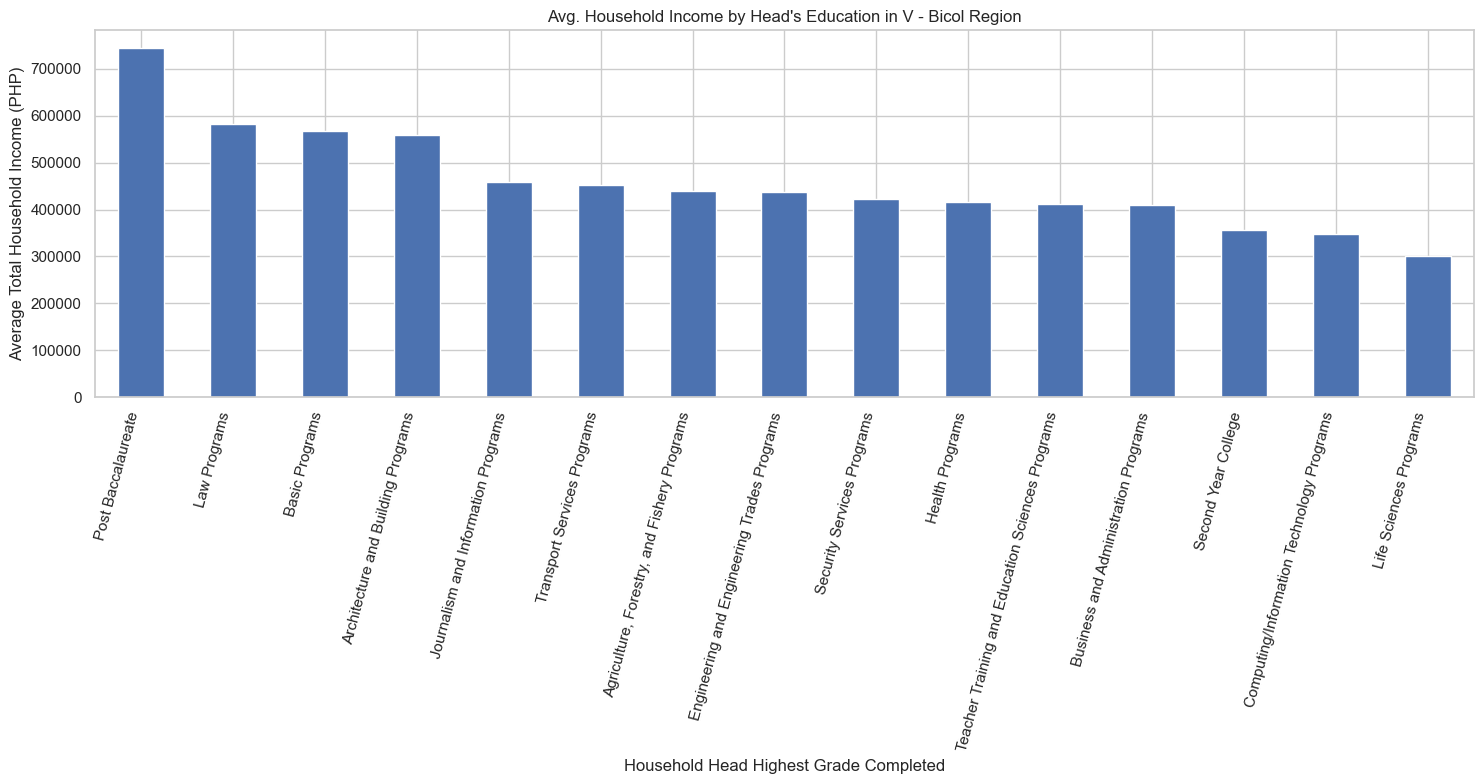

In [ ]:
if 'df' in locals() and df is not None and 'unique_regions' in locals():
    if 'Household Head Highest Grade Completed' in df.columns:
        print("\n--- Interactive Insight: Education Level vs. Average Income by Region ---")
        print("Select a region to see average income by household head's education level.")
        
        region_choice_edu = get_categorical_input("Region: ", unique_regions)
        
        df_selected_region_edu = df[df['Region'] == region_choice_edu]
        
        if df_selected_region_edu.empty:
            print(f"No data available for {region_choice_edu} after initial processing.")
        else:
            
            education_income = df_selected_region_edu.groupby('Household Head Highest Grade Completed')['Total Household Income'].mean().sort_values(ascending=False)
            
            if education_income.empty:
                print(f"No 'Household Head Highest Grade Completed' data or income data for households in {region_choice_edu}.")
            else:
                print(f"\nAverage Household Income by Head's Education Level in {region_choice_edu}:")
                display(education_income.to_frame(name='Average Income').round(0).style.format('{:,.0f}'))
                
                if len(education_income) > 15:
                    print("Plotting top 15 education levels by average income due to large number of categories.")
                    education_income.head(15).plot(kind='bar', figsize=(15, 8))
                else:
                    education_income.plot(kind='bar', figsize=(15, 8))
                    
                plt.title(f'Avg. Household Income by Head\'s Education in {region_choice_edu}')
                plt.ylabel('Average Total Household Income (PHP)')
                plt.xlabel('Household Head Highest Grade Completed')
                plt.xticks(rotation=75, ha='right')
                plt.tight_layout()
                plt.show()
    else:
        print("Column 'Household Head Highest Grade Completed' not found. This insight cannot be generated.")
else:
    print("DataFrame 'df' or 'unique_regions' not found. Please run previous cells.")